In [45]:
#!pip install python-binance
#!pip install tensorflow
#!pip install scikit-learn
#!pip install keras


In [44]:
import binance
from binance.client import Client
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import yaml
import keras

In [9]:
stream = open("C:/Users/alan_/Python Notebooks/PortfolioDS/PortfolioDS/PortifolioDS-Github/PortifolioDS/Bot Telegram Binance/config.yaml", 'r')
c = yaml.safe_load(stream)
#api binance
api_key_binance = c['api_key']
api_secret_binance = c['api_secret']

In [82]:
def collect_data(symbol, interval):

    # Instanciando o cliente Binance
    client = Client(api_key_binance, api_secret_binance)

    # Coletando dados históricos da Binance
    data = client.get_klines(symbol='BTCUSDT', interval=Client.KLINE_INTERVAL_1DAY, limit=1000)

    df = pd.DataFrame(data, columns=['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume', 'Ignore'])
    df['Open time'] = pd.to_datetime(df['Open time'], unit='ms')
    df = df.set_index('Open time')
    df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
    df = df.astype(float)
    return df

df = collect_data('BTCUSDT', Client.KLINE_INTERVAL_1DAY)

In [35]:
df.shape

(1000, 5)

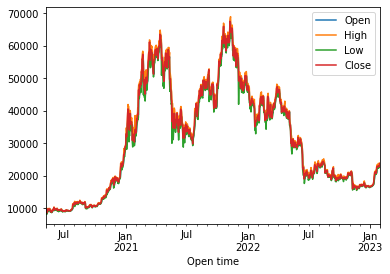

In [59]:
df[['Open', 'High', 'Low', 'Close']].plot();

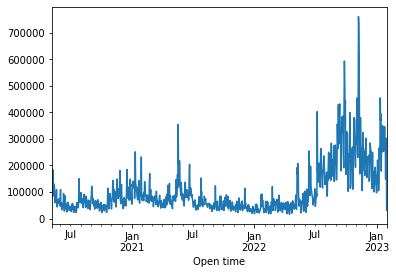

In [60]:
df['Volume'].plot();

In [83]:
def create_indicators(df):
    df['MA_10'] = df['Close'].rolling(10).mean()
    df['MA_50'] = df['Close'].rolling(50).mean()
    df['MA_200'] = df['Close'].rolling(200).mean()
    return df

df = create_indicators(df)

In [73]:
df.head()

,Open,High,Low,Close,Volume,MA_10,MA_50,MA_200
Open time,,,,,,,,
2020-05-07,9143.40,10067.00,9021.0,9986.40,147154.611378,NaN,NaN,NaN
2020-05-08,9986.30,10035.96,9705.0,9800.01,100683.796400,NaN,NaN,NaN
2020-05-09,9800.02,9914.25,9520.0,9539.40,81950.679567,NaN,NaN,NaN
2020-05-10,9539.10,9574.83,8117.0,8722.77,183865.182028,NaN,NaN,NaN
2020-05-11,8722.77,9168.00,8200.0,8561.52,168807.251832,NaN,NaN,NaN


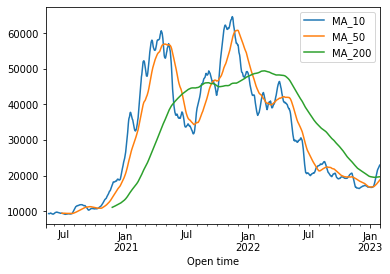

In [74]:
df[['MA_10','MA_50','MA_200']].plot();

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Separando os dados em conjunto de treinamento e validação
train_df, validate_df = train_test_split(df, test_size=0.2, shuffle=False)

# Normalizando os dados
scaler = MinMaxScaler(feature_range=(0, 1))
train = scaler.fit_transform(train_df)
validate = scaler.transform(validate_df)


In [76]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# Criando o modelo
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=train.shape[1]))
model.add(Dense(1, activation='sigmoid'))

# Compilando o modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [77]:
#Previsão de preço de fechamento:

train_df['Target'] = train_df['Close']
target = train_df['Target']

validate_df['Target'] = validate_df['Close']
target_val = validate_df['Target']


In [78]:
train_df.tail()

,Open,High,Low,Close,Volume,MA_10,MA_50,MA_200,Target
Open time,,,,,,,,,
2022-07-11,20861.11,20868.48,19875.23,19963.61,137535.40724,20518.333,24483.1000,36428.05990,19963.61
2022-07-12,19963.61,20059.42,19240.00,19328.75,139506.45862,20525.927,24287.4920,36270.60365,19328.75
2022-07-13,19331.28,20366.61,18910.94,20234.87,209250.24888,20617.831,24099.0978,36119.77970,20234.87
2022-07-14,20234.87,20900.00,19616.07,20588.84,174809.21696,20653.044,23920.0316,35968.84645,20588.84
2022-07-15,20588.84,21200.00,20382.29,20830.04,143343.30490,20718.465,23752.6054,35819.48945,20830.04


In [ ]:
#Previsão de variação de preço:


#df['Target'] = df['Close'].pct_change()
#target = df['Target']


In [79]:
# Treinando o modelo
model.fit(train, target, epochs=10, batch_size=32)

# Avaliando o modelo com os dados de validação
score = model.evaluate(validate, target_val, batch_size=32)
print("\nAccuracy: ", score[1])


Epoch 1/10
25/25 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 2/10
25/25 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 3/10
25/25 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 4/10
25/25 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 5/10
25/25 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 6/10
25/25 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 7/10
25/25 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 8/10
25/25 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 9/10
25/25 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 10/10
7/7 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00

Accuracy: 

In [85]:
# Separando os dados em conjunto de treinamento e validação
train_df, validate_df = train_test_split(df, test_size=0.2, shuffle=False)

# Normalizando os dados de treinamento e validação
scaler = MinMaxScaler(feature_range=(0, 1))
train_df_normalized = scaler.fit_transform(train_df)
validate_df_normalized = scaler.transform(validate_df)

train_df['Target'] = train_df['Close']
target = train_df['Target']

validate_df['Target'] = validate_df['Close']
target_val = validate_df['Target']

# Separando o target de treinamento e validação
target = train_df['Target']
target_val = validate_df['Target']

# Normalizando o target de treinamento e validação
target_normalized = scaler.fit_transform(target.values.reshape(-1, 1))
target_val_normalized = scaler.transform(target_val.values.reshape(-1, 1))

# Treinando o modelo com os dados normalizados
model.fit(train_df_normalized, target_normalized, epochs=10, batch_size=32)

# Avaliando o modelo com os dados de validação normalizados
score = model.evaluate(validate_df_normalized, target_val_normalized, batch_size=32)
print("\nAccuracy: ", score[1])

Epoch 1/10
25/25 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0012
Epoch 2/10
25/25 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0012
Epoch 3/10
25/25 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0012
Epoch 4/10
25/25 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0012
Epoch 5/10
25/25 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0012
Epoch 6/10
25/25 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0012
Epoch 7/10
25/25 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0012
Epoch 8/10
25/25 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0012
Epoch 9/10
25/25 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0012
Epoch 10/10
7/7 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00

Accuracy:  0.0


In [2]:
import requests
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense

# Recebendo os dados da API da Binance
url = "https://api.binance.com/api/v3/klines?symbol=BTCUSDT&interval=1d&limit=2000"
data = requests.get(url).json()

# Transformando os dados em dataframe
df = pd.DataFrame(data)
df = df.drop(range(6, 12), axis=1)
df.columns = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume']
df['Open time'] = pd.to_datetime(df['Open time'], unit='ms')
df.set_index('Open time', inplace=True)
df = df.astype(float)

# Separando os dados em conjunto de treinamento e validação
train_df, validate_df = train_test_split(df, test_size=0.2, shuffle=False)

# Normalizando os dados
scaler = MinMaxScaler(feature_range=(0, 1))
train_df_scaled = scaler.fit_transform(train_df)
validate_df_scaled = scaler.transform(validate_df)

# Definindo o target
train_df['Target'] = train_df['Close']
target = np.array(train_df['Target'])
validate_df['Target'] = validate_df['Close']
target_val = np.array(validate_df['Target'])

# Criando o modelo
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=train_df_scaled.shape[1]))
model.add(Dense(1, activation='sigmoid'))

# Compilando o modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinando o modelo
model.fit(train_df_scaled, target, epochs=10, batch_size=32)

# Avaliando o modelo com os dados de validação
score = model.evaluate(validate_df_scaled, target_val, batch_size=32)
print("\nAccuracy: ", score[1])


Epoch 1/10
25/25 [==============================] - 1s 1ms/step - loss: -2039.4369 - accuracy: 0.0000e+00
Epoch 2/10
25/25 [==============================] - 0s 1ms/step - loss: -15529.1025 - accuracy: 0.0000e+00
Epoch 3/10
25/25 [==============================] - 0s 1ms/step - loss: -33946.8281 - accuracy: 0.0000e+00
Epoch 4/10
25/25 [==============================] - 0s 6ms/step - loss: -59652.1953 - accuracy: 0.0000e+00
Epoch 5/10
25/25 [==============================] - 0s 1ms/step - loss: -92536.1719 - accuracy: 0.0000e+00
Epoch 6/10
25/25 [==============================] - 0s 1ms/step - loss: -129354.7578 - accuracy: 0.0000e+00
Epoch 7/10
25/25 [==============================] - 0s 1ms/step - loss: -171404.8594 - accuracy: 0.0000e+00
Epoch 8/10
25/25 [==============================] - 0s 1ms/step - loss: -218342.2812 - accuracy: 0.0000e+00
Epoch 9/10
25/25 [==============================] - 0s 1ms/step - loss: -270520.2500 - accuracy: 0.0000e+00
Epoch 10/10
7/7 [=================

In [3]:
df.head()

,Open,High,Low,Close,Volume
Open time,,,,,
2020-05-07,9143.40,10067.00,9021.0,9986.40,147154.611378
2020-05-08,9986.30,10035.96,9705.0,9800.01,100683.796400
2020-05-09,9800.02,9914.25,9520.0,9539.40,81950.679567
2020-05-10,9539.10,9574.83,8117.0,8722.77,183865.182028
2020-05-11,8722.77,9168.00,8200.0,8561.52,168807.251832


In [4]:
train_df.head()

,Open,High,Low,Close,Volume,Target
Open time,,,,,,
2020-05-07,9143.40,10067.00,9021.0,9986.40,147154.611378,9986.40
2020-05-08,9986.30,10035.96,9705.0,9800.01,100683.796400,9800.01
2020-05-09,9800.02,9914.25,9520.0,9539.40,81950.679567,9539.40
2020-05-10,9539.10,9574.83,8117.0,8722.77,183865.182028,8722.77
2020-05-11,8722.77,9168.00,8200.0,8561.52,168807.251832,8561.52


In [5]:
validate_df.head()

,Open,High,Low,Close,Volume,Target
Open time,,,,,,
2022-07-16,20830.04,21588.94,20478.61,21195.60,121011.67393,21195.60
2022-07-17,21195.60,21684.54,20750.01,20798.16,118229.45250,20798.16
2022-07-18,20799.58,22777.63,20762.45,22432.58,239942.73132,22432.58
2022-07-19,22432.58,23800.00,21579.54,23396.62,263770.76574,23396.62
2022-07-20,23398.48,24276.74,22906.19,23223.30,238762.17094,23223.30


In [26]:
import requests

symbol = "BTCUSDT"
interval = "1d"
url = f"https://api.binance.com/api/v1/klines?symbol={symbol}&interval={interval}"

data = requests.get(url).json()


In [27]:
import pandas as pd

# Converter em dataframe
headers = ["Open time", "Open", "High", "Low", "Close", "Volume", "Close time", "Quote asset volume", "Number of trades", "Taker buy base asset volume", "Taker buy quote asset volume", "Ignore"]
df = pd.DataFrame(data, columns=headers)
df = df.drop(columns=["Open time", "Close time", "Ignore"])
df = df.astype(float)


In [28]:
import numpy as np

df['SMA20'] = df['Close'].rolling(window=20).mean()
df['SMA50'] = df['Close'].rolling(window=50).mean()
df['EMA20'] = df['Close'].ewm(span=20, adjust=False).mean()
df['EMA50'] = df['Close'].ewm(span=50, adjust=False).mean()
delta = df['Close'].diff()
gain = delta.where(delta > 0, 0)
Loss = delta.where(delta < 0, 0)
avg_gain = gain.rolling(14).mean()
avg_loss = Loss.rolling(14).mean().abs()
RS = avg_gain / avg_loss
df['RSI14'] = 100 - (100 / (1 + RS))
df['BB_UPPER'] = df['Close'].rolling(window=20).mean() + 2 * df['Close'].rolling(window=20).std()
df['BB_LOWER'] = df['Close'].rolling(window=20).mean() - 2 * df['Close'].rolling(window=20).std()

df.dropna(inplace=True)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Separando os dados em conjunto de treinamento e validação
train_df, validate_df = train_test_split(df, test_size=0.2, shuffle=False)

# Normalizando os dados
scaler = MinMaxScaler(feature_range=(0, 1))
train = scaler.fit_transform(train_df.drop(columns=['Close']))
validate = scaler.transform(validate_df.drop(columns=['Close']))


In [30]:
train_df['Target'] = train_df['Close']
target = train_df['Target']

validate_df['Target'] = validate_df['Close']
target_val = validate_df


In [32]:
df.head()

,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,SMA20,SMA50,EMA20,EMA50,RSI14,BB_UPPER,BB_LOWER
49,61470.62,63286.35,61322.78,63273.59,25515.688300,1.585745e+09,1068629.0,13567.097820,8.433844e+08,61860.7935,54907.6814,60908.706181,56931.184450,56.371024,65128.091366,58593.495634
50,63273.58,67789.00,63273.58,67525.83,54442.094554,3.575716e+09,2349581.0,28879.186436,1.897321e+09,62023.0555,55313.3630,61538.908449,57346.660746,60.573779,66034.040737,58012.070263
51,67525.82,68524.25,66222.40,66947.66,44661.378068,3.014327e+09,1847655.0,22243.236452,1.501549e+09,62070.3680,55792.0038,62054.027645,57723.170521,67.550235,66295.547354,57845.188646
52,66947.67,69000.00,62822.90,64882.43,65171.504046,4.335576e+09,2347934.0,31344.743321,2.088305e+09,62204.8320,56274.9648,62323.399298,58003.925794,67.017630,66613.643121,57796.020879
53,64882.42,65600.07,64100.00,64774.26,37237.980580,2.415537e+09,1327827.0,18589.514790,1.205890e+09,62409.1340,56699.5778,62556.814603,58269.429097,62.382782,66899.960574,57918.307426


In [33]:

from keras.models import Sequential
from keras.layers import Dense

# Criando o modelo
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=train.shape[1]))
model.add(Dense(1, activation='sigmoid'))

# Compilando o modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinando o modelo
model.fit(train, target, epochs=10, batch_size=32)

# Avaliando o modelo com os dados de validação
score = model.evaluate(validate, target_val, batch_size=32)
print("\nAccuracy: ", score[1])

Epoch 1/10
12/12 [==============================] - 1s 1ms/step - loss: -25398.9922 - accuracy: 0.0000e+00
Epoch 2/10
12/12 [==============================] - 0s 1ms/step - loss: -39130.0898 - accuracy: 0.0000e+00
Epoch 3/10
12/12 [==============================] - 0s 1ms/step - loss: -53595.7148 - accuracy: 0.0000e+00
Epoch 4/10
12/12 [==============================] - 0s 1ms/step - loss: -69302.3438 - accuracy: 0.0000e+00
Epoch 5/10
12/12 [==============================] - 0s 1ms/step - loss: -87024.2188 - accuracy: 0.0000e+00
Epoch 6/10
12/12 [==============================] - 0s 1ms/step - loss: -106359.2031 - accuracy: 0.0000e+00
Epoch 7/10
12/12 [==============================] - 0s 1ms/step - loss: -128689.6406 - accuracy: 0.0000e+00
Epoch 8/10
12/12 [==============================] - 0s 1ms/step - loss: -151673.7969 - accuracy: 0.0000e+00
Epoch 9/10
12/12 [==============================] - 0s 2ms/step - loss: -177787.1250 - accuracy: 0.0000e+00
Epoch 10/10
12/12 [==============

ValueError: in user code:

    File "c:\Python310\lib\site-packages\keras\engine\training.py", line 1820, in test_function  *
        return step_function(self, iterator)
    File "c:\Python310\lib\site-packages\keras\engine\training.py", line 1804, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Python310\lib\site-packages\keras\engine\training.py", line 1792, in run_step  **
        outputs = model.test_step(data)
    File "c:\Python310\lib\site-packages\keras\engine\training.py", line 1758, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Python310\lib\site-packages\keras\engine\training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "c:\Python310\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Python310\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Python310\lib\site-packages\keras\losses.py", line 284, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Python310\lib\site-packages\keras\losses.py", line 2176, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "c:\Python310\lib\site-packages\keras\backend.py", line 5680, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((None, 1) vs (None, 17)).
